In [1]:
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.models import clone_model
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from numpy.random import default_rng
from tensorflow.keras.models import load_model
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

In [13]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
train_images.shape

(50000, 32, 32, 3)

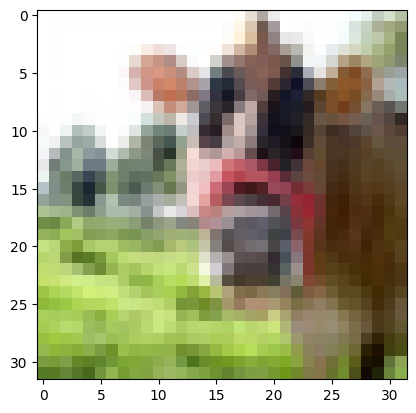

In [5]:
plt.imshow(train_images[0])

In [6]:
train_labels_flat = train_labels.flatten()

In [7]:
rng = default_rng(42)

In [8]:
labels = np.unique(train_labels_flat)

In [9]:
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [10]:
selected_labels = rng.choice(labels, size=10, replace=False)

In [11]:
selected_labels

array([96, 71,  8, 60, 41, 94, 68,  9, 19, 82])

In [12]:
selected_images = []
selected_labels_list = []

In [13]:
for label in selected_labels:
    label_rng = default_rng(42 + label)
    indices = np.where(train_labels == label)[0]
    idx = label_rng.choice(indices)
    selected_images.append(train_images[idx])
    selected_labels_list.append(label)

In [14]:
selected_images

[array([[[0.78039216, 0.70980392, 0.62745098],
         [0.72156863, 0.65490196, 0.56470588],
         [0.66666667, 0.6       , 0.51764706],
         ...,
         [0.72156863, 0.76862745, 0.85490196],
         [0.74117647, 0.8       , 0.91764706],
         [0.72941176, 0.78431373, 0.90588235]],
 
        [[0.76078431, 0.69019608, 0.60392157],
         [0.72941176, 0.65882353, 0.58823529],
         [0.63921569, 0.57647059, 0.48235294],
         ...,
         [0.67843137, 0.7254902 , 0.81960784],
         [0.74509804, 0.80392157, 0.90980392],
         [0.7254902 , 0.78431373, 0.89803922]],
 
        [[0.70196078, 0.63921569, 0.54509804],
         [0.72941176, 0.6627451 , 0.58823529],
         [0.67058824, 0.60784314, 0.51372549],
         ...,
         [0.63529412, 0.66666667, 0.74901961],
         [0.70980392, 0.77254902, 0.88235294],
         [0.7372549 , 0.8       , 0.90588235]],
 
        ...,
 
        [[0.4       , 0.34117647, 0.23137255],
         [0.41176471, 0.34509804, 0.24313

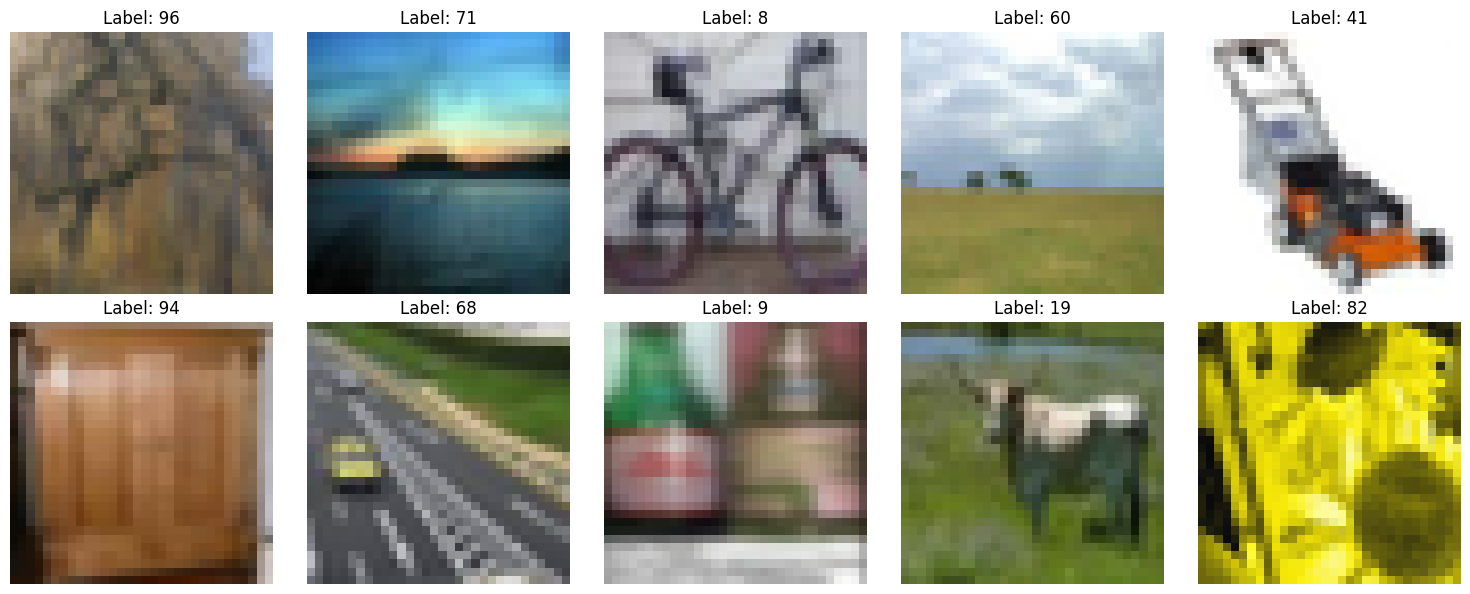

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for img, lbl, ax in zip(selected_images, selected_labels_list, axes):
    ax.imshow(img)
    ax.set_title(f'Label: {lbl}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [16]:
selected_labels_list

[96, 71, 8, 60, 41, 94, 68, 9, 19, 82]

In [17]:
X = np.array(selected_images)
y = np.array(selected_labels_list)

In [18]:
X = X.astype('float32')/255.0

In [19]:

label_mapping = {label: idx for idx, label in enumerate(selected_labels)}
y_mapped = np.array([label_mapping[label] for label in y])

In [20]:
y_mapped

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
from tensorflow.keras.utils import to_categorical
y_one_hot = to_categorical(y_mapped, num_classes=10)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



In [23]:
model_list = []

for i in range(10):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=X.shape[1:], name='conv1'),
        MaxPooling2D((2,2), name='pool1'),
        Conv2D(64, (3,3), activation='relu', name='conv2'),
        MaxPooling2D((2,2), name='pool2'),
        Flatten(name='flatten'),
        Dense(64, activation='relu', name='fc1'),
        Dense(10, activation='softmax', name='output')
        ])
    model_list.append(model)

2024-10-25 14:45:21.243872: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-25 14:45:21.267119: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-25 14:45:21.267246: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [24]:
loss_list = []
accuracy_list = []

In [25]:
def get_flops(model, input_shape):
    # Create a concrete function from the Keras model
    @tf.function
    def model_func(x):
        return model(x)
    
    # Get the concrete function
    concrete_func = model_func.get_concrete_function(tf.TensorSpec(input_shape, model.inputs[0].dtype))
    
    # Convert variables to constants and get the frozen graph
    frozen_func = convert_variables_to_constants_v2(concrete_func)
    frozen_graph = frozen_func.graph.as_graph_def()
    
    # Use TensorFlow's profiler
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(frozen_graph, name='')
        run_meta = tf.compat.v1.RunMetadata()
        with tf.compat.v1.Session(graph=graph) as sess:
            flops = tf.compat.v1.profiler.profile(
                graph=graph,
                run_meta=run_meta,
                cmd='op',
                options=tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
            )
            return flops.total_float_ops

In [26]:
for i in model_list:
    i.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    i.fit(X, y_one_hot, epochs=100, batch_size=2)
    loss_list.append(i.evaluate(X, y_one_hot)[0])
    accuracy_list.append(i.evaluate(X, y_one_hot)[1])

Epoch 1/100


2024-10-25 14:45:22.251255: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-10-25 14:45:22.628860: I external/local_xla/xla/service/service.cc:168] XLA service 0x70983aa2b330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-25 14:45:22.628876: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-10-25 14:45:22.638212: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1729835122.699312  642246 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 1s 3ms/step - loss: 2.3062 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 2.3037 - accuracy: 0.1000
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 2.3033 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 2.3033 - accuracy: 0.1000
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 2.3033 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 2.3030 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 2.3029 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 2.3029 - accuracy: 0.1000
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 2.3029 - accuracy: 0.1000
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 2.3028 - accuracy: 0.1000
Epoch 11/100
5/5 [===

In [27]:
accuracy_list

[1.0,
 1.0,
 0.10000000149011612,
 1.0,
 0.10000000149011612,
 1.0,
 1.0,
 1.0,
 0.30000001192092896,
 1.0]

In [28]:
#for idx, model in enumerate(model_list):
#    model.save(f'model_{idx}.h5')

In [29]:
def get_layer(model, layer_index):
    return [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)][layer_index]

def get_filters(model, layer_index, filter_indices):
    layer = get_layer(model, layer_index)
    filters, biases = layer.get_weights()
    return filters[:, :, :, filter_indices]

In [30]:
def norms(model_index, layer_index, model_list):    
    model_norm_list = []
    for model_idx, model in enumerate(model_list):
        #print(model_idx)
        layer_norm_list = []
        for layer_idx, layer in enumerate([layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]):
            #print(layer_idx)
            norm_list = []
            filters, biases = layer.get_weights()
            num_filters = filters.shape[-1]
            for i in range(num_filters):
                
                filt = filters[:, :, :, i]
                filt_matrix = filt.reshape(-1, filt.shape[-1])
                norm = np.linalg.norm(filt_matrix)
                norm_list.append(norm)
            layer_norm_list.append(norm_list)
        model_norm_list.append(layer_norm_list)
    return model_norm_list[model_index][layer_index]
            
            

In [31]:
def filter_to_zero(norms, percentage):
    threshold = np.percentile(norms, percentage)
    return [i for i, norm in enumerate(norms) if norm < threshold]

def filter_to_keep(norms, percentage):
    threshold = np.percentile(norms, percentage)
    return [i for i, norm in enumerate(norms) if norm >= threshold]

Set insignificant filters elements to 0, doesnt reduce FLOPS XD



In [32]:
'''for model_idx, model in enumerate(model_list):
    for layer_idx, layer in enumerate([layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]):
        w, b = layer.get_weights()
        w[:, :, :, filter_to_zero(norms(model_idx, layer_idx, model_list), 85)] = 0
        b[filter_to_zero(norms(model_idx, layer_idx, model_list), 85)] = 0
        layer.set_weights([w, b])'''

'for model_idx, model in enumerate(model_list):\n    for layer_idx, layer in enumerate([layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]):\n        w, b = layer.get_weights()\n        w[:, :, :, filter_to_zero(norms(model_idx, layer_idx, model_list), 85)] = 0\n        b[filter_to_zero(norms(model_idx, layer_idx, model_list), 85)] = 0\n        layer.set_weights([w, b])'

Try to remove some entirely the insignificant filters

In [33]:
keep_filt = filter_to_keep(norms(0, 1, model_list), 85)

In [34]:
keep_filt

[0, 1, 12, 19, 20, 27, 28, 32, 34, 60]

In [35]:
pruned_target_model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=X.shape[1:], name='target_conv1'),
        MaxPooling2D((2,2), name='target_pool1'),
        Conv2D(len(keep_filt), (3,3), activation='relu', name='target_conv2'),
        MaxPooling2D((2,2), name='target_pool2'),
        Flatten(name='target_flatten'),
        Dense(len(keep_filt), activation='relu', name='target_fc1'),
        Dense(10, activation='softmax', name='target_output')
        ])

In [36]:
def copy_weights_pruned(source_model, pruned_target_model):
    for source_layer, target_layer in zip(source_model.layers, pruned_target_model.layers):
        if isinstance(source_layer, tf.keras.layers.Conv2D) and source_layer.name != 'conv2' and pruned_target_model.name != 'target_conv2':
            w, b = source_layer.get_weights()
            target_layer.set_weights([w, b])
        elif source_layer.name == 'conv2' and pruned_target_model.name != 'target_conv2':
            w, b = source_layer.get_weights()
            target_layer.set_weights([w[:, :, :, keep_filt], b[keep_filt]])
        

In [37]:
copy_weights_pruned(model_list[0], pruned_target_model)

In [38]:
pruned_target_model.get_layer('target_conv2').get_weights()[0].shape

(3, 3, 32, 10)

In [39]:
model_list[0].get_layer('conv2').get_weights()[0].shape

(3, 3, 32, 64)

In [40]:
pruned_target_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
pruned_target_model.fit(X, y_one_hot, epochs=100, batch_size=2)

Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 2.4061 - accuracy: 0.1000
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 2.3263 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 2.2431 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 2.2291 - accuracy: 0.1000
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 2.2036 - accuracy: 0.2000
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 2.1815 - accuracy: 0.4000
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 2.1600 - accuracy: 0.2000
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 2.1386 - accuracy: 0.2000
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 2.1268 - accuracy: 0.2000
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 2.1022 - accuracy: 0.3000
Epoch 11/100
5/5 [===